## Canny Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the image

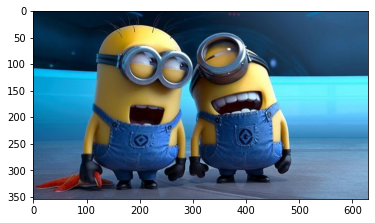

In [2]:
img=plt.imread('minion.jpeg')
plt.imshow(img)

 Reduce the number of channels by taking the average of the values of the three channels. 

In [3]:
def bw(img):
    I=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            I[i,j]=np.round(np.mean(img[i,j]))
    return I

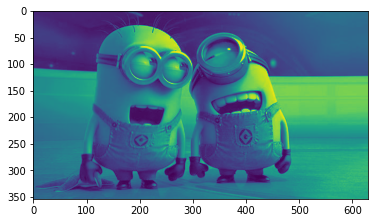

In [4]:
i=bw(img)
plt.imshow(i)

### Canny Implementation

Canny filter involves <br>
i.Gradient calculation<br>
ii.Angle calculation to know the direction of the change <br>
iii.Non-maximum suppression<br>
All these steps are to find the points of high intensity change in the image.

In [5]:
def gaussien(img):
    L=np.zeros(img.shape)
    p=img.shape[0]-1
    q=img.shape[1]-2
    for i in range(1,p,1):
        for j in range(2,q,1):
            L[i][j]=np.round((img[i-1][j-1]+2*img[i][j-1]+img[i+1][j-1]+2*img[i][j-1]+4*img[i][j]+2*img[i][j+1]+img[i+1][j-1]+2*img[i+1][j]+img[i+1][j+1])/16)
    return L 

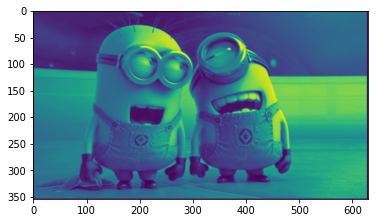

In [6]:
imggauss=gaussien(i)
plt.imshow(imggauss)

In [7]:
def Gx(img):
    L=np.zeros(img.shape)
    p=img.shape[0]-1
    q=img.shape[1]-1
    for i in range (0,p,1):
        for j in range(1,q,1):
            L[i][j]=np.sum(img[i][j-1]+img[i][j+1]*(-1))
    return L

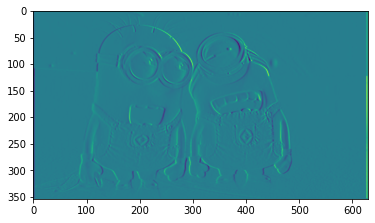

In [8]:
gx=Gx(imggauss)
plt.imshow(gx)

In [9]:
def Gy(img):
    L=np.zeros(img.shape)
    p=img.shape[0]-1
    q=img.shape[1]-1
    for i in range (1,p,1):
        for j in range(0,q,1):
            L[i][j]=np.sum(img[i-1][j]+img[i+1][j]*(-1))
    return L

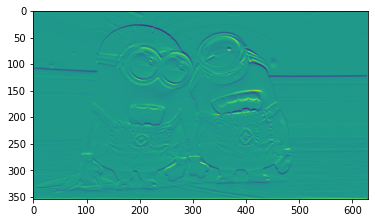

In [10]:
gy=Gy(imggauss)
plt.imshow(gy)

In [11]:
#function pour les valeur absolute des gradient
def nom(img1,img2):
    L=np.zeros(img1.shape)
    p=img1.shape[0]
    q=img1.shape[1]
    for i in range(0,p,1):
        for j in range(0,q,1):
            L[i][j]=np.round(np.sqrt(img1[i][j]**2+img2[i][j]**2))
    return L

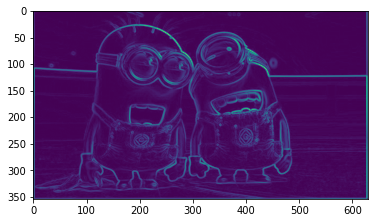

In [12]:
nn=nom(gx,gy)
plt.imshow(nn)

In [13]:
#en entrer les gradient en direction x et y
def angle(img1,img2):
    L=np.zeros(img1.shape)
    p=img1.shape[0]
    q=img1.shape[1]
    for i in range(0,p,1):
        for j in range(0,q,1):
            if(img2[i][j]==0):
                L[i][j]=0
            else:
                L[i][j]=np.round(np.arctan(img1[i][j]*(1)/img2[i][j]))
    return L

In [14]:
l=np.arctan2(gy,gx)
ang=np.degrees(l)
ang=np.round(ang//45)*45

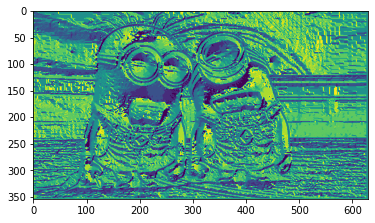

In [15]:
plt.imshow(ang)

In [16]:
#pour changer tous les angles negatif en positif
def nomang(img):
    L=np.zeros(img.shape)
    p=img.shape[0]
    q=img.shape[1]
    for i in range(0,p,1):
        for j in range(0,q,1):
            if(img[i][j]<0):
                L[i][j]=img[i][j]+360
            else:
                L[i][j]=img[i][j]
    return L

In [17]:
deg=nomang(ang)

### Non-maximum suppresion

In [18]:
def suppression(img1,img2,smin,smax):
    L=np.zeros(img1.shape)
    p=img1.shape[0]-1
    q=img1.shape[1]-1
    for i in range(0,p-1,1):
        for j in range(0,q-1,1):
            if(img1[i][j]>smax):
                L[i][j]=255
            if(img1[i][j]<smin):
                L[i][j]=0
            if(img1[i][j]<=smax and img1[i][j]>=smin):
                
                if(img2[i][j]==45 or img2[i][j]==225):
                    if(np.maximum(img2[i+1][j+1],img2[i-1][j-1])>img1[i][j]):
                        L[i][j]=0
                    else:
                        L[i][j]=255
                if(img2[i][j]==90 or img2[i][j]==270):
                    if(np.maximum(img2[i][j-1],img2[i][j+1])>img1[i][j]):
                        L[i][j]=0
                    else:
                        L[i][j]=255
                if(img2[i][j]==135 or img2[i][j]==315):
                    if(np.maximum(img2[i-1][j-1],img2[i+1][j+1])>img1[i][j]):
                        L[i][j]=0
                    else:
                        L[i][j]=255
                if(img2[i][j]==180 or img2[i][j]== 0):
                    if(np.maximum(img2[i-1][j],img2[i+1][j])>img1[i][j]):
                        L[i][j]=0
                    else:
                        L[i][j]=255
    return L

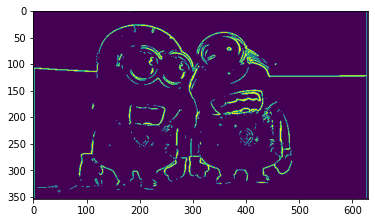

In [19]:
s=suppression(nn,deg,30,50)
plt.imshow(s)